# HW #5 Practice Worksheet: Animacy

As practice for HW #5, this Python notebook shows how to use NLTK's feature structure syntax, and visualize it in a way that will make debugging easier.

## Helper Functions

One of the powers of using a notebook like this is that is essentially an interpreter, so we can treat it like an interactive sandbox, with some helpful visualization tools as well.

We start out with a few helper functions below to help us compactly develop our grammars.

In [5]:
import nltk, re

def init_parser(grammar_str):
    """
    Initialize a feature parser based on the input grammar string.
    """
    grammar = nltk.grammar.FeatureGrammar.fromstring(grammar_str)
    return nltk.parse.FeatureIncrementalChartParser(grammar)

def init_sents(sent_str):
    """
    Parse in a series of sentences, and their acceptability notation
    as a tuple of (is_valid, sent).
    """
    for sent in [s.strip() for s in sent_str.split('\n') if s.strip()]:
        is_valid = not sent.startswith('*')
        tokens = nltk.tokenize.word_tokenize(re.sub('^\*?\s*', '', sent))
        yield is_valid, tokens

# A few IPython visualization tools
from IPython.core.display import display_html, display_png
def csscolor(s, c): return '<span style="color: {};">{}</span>'.format(c, s)
def html(s): display_html(s, raw=True)
    
def check_coverage(grammar_str, sent_str):
    """
    A helper function to iterate over our defined grammar and sentence key,
    and tell us whether or not we got the answer right for the given sentence.
    
    :type sent_list: list[str]
    """
    ret_str = ''
    parser = init_parser(grammar_str)
    for is_valid, tokens in init_sents(sent_str):
        valid_marker = '' if is_valid else '&#42; '
        sent_repr = '{}{}'.format(valid_marker, ' '.join(tokens))
        
        def sent_error(extra=''):
            html('\u274C &nbsp;' + csscolor(sent_repr + extra, 'red'))
        def sent_success(extra=''):
            html('\u2705 &nbsp;' + csscolor(sent_repr + extra, 'green'))
        try:
            parses = list(parser.parse(tokens))
        except ValueError as ve:
            html('\u274C ' + csscolor(str(ve), 'red'))
            continue
        
        if not parses:
            if is_valid:
                sent_error()
            else:
                sent_success()
        else:
            first_parse = ' {}'.format(parses[0])
            if is_valid:                   
                sent_success()
            else:
                sent_error()
            display_png(parses[0])
    display_html(ret_str, raw=True)

# Practice

Now that we've got the helper functions out of the way, let's get down to defining our grammar.

Here, we're going to look at how some verbs seem to expect certain of their arguments to have animacy, as expressed by the following sentences:

* *Alex gifted Ahmed a book*
* <span style="color:red">\* *Alex gifted the rock a book*</span>

Let's see if we can figure out how to provide an analysis that accepts *"Ahmed"* as an indirect object, but not *"the rock*".

<small>*...although for an added challenge, add an analysis for the +animacy version of "The Rock" that goes by "Dwayne.""*</small>

✅   Alex gifted Ahmed a book

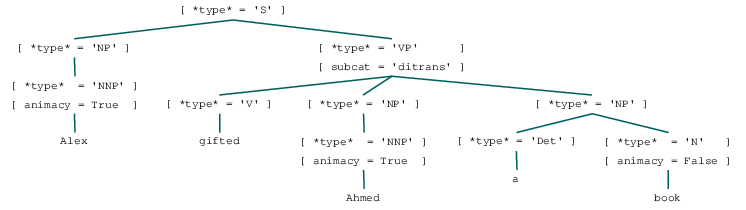

❌   * Alex gifted the rock a book

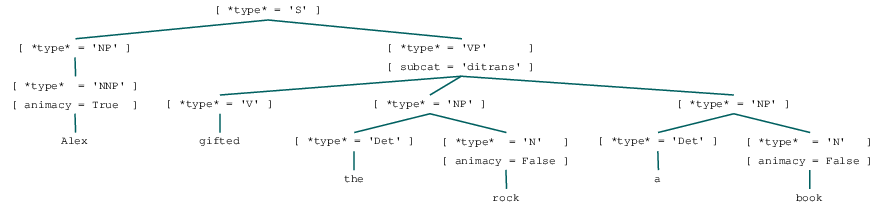

In [6]:
sentences = '''
Alex gifted Ahmed a book
* Alex gifted the rock a book
'''

grammar='''%start S
S -> NP VP
VP[subcat=ditrans] -> V NP NP

NP -> NNP
NP -> Det N

NNP[animacy=True] -> 'Alex' | 'Ahmed'
V -> 'gifted'
Det -> 'a' | 'the'
N[animacy=False] -> 'book' | 'rock'
'''

check_coverage(grammar, sentences)